In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [2]:
data=pd.read_csv('askmefi_category_year.tsv',sep='\t')

In [3]:
data.head()

year                     category     n
0  2004  clothing, beauty, & fashion   141
1  2004         computers & internet  2489
2  2004                    education   151
3  2004                 food & drink   275
4  2004                     grab bag   285

In [4]:
data.tail()

year                       category    n
215  2014  sports, hobbies, & recreation  235
216  2014                     technology  338
217  2014        travel & transportation  570
218  2014                   work & money  682
219  2014             writing & language  222

In [5]:
data.category.unique()

array(['clothing, beauty, & fashion', 'computers & internet', 'education',
       'food & drink', 'grab bag', 'health & fitness', 'home & garden',
       'human relations', 'law & government', 'media & arts',
       'pets & animals', 'religion & philosophy', 'science & nature',
       'shopping', 'society & culture', 'sports, hobbies, & recreation',
       'technology', 'travel & transportation', 'work & money',
       'writing & language'], dtype=object)

In [6]:
categories=data.category.unique()
mydata={}
for i in categories:
    mydata[i]=data[data.category==i]

In [7]:
len(mydata)

20

In [26]:
mydata

{'clothing, beauty, & fashion':      year                     category    n
 0    2004  clothing, beauty, & fashion  141
 20   2005  clothing, beauty, & fashion  203
 40   2006  clothing, beauty, & fashion  195
 60   2007  clothing, beauty, & fashion  296
 80   2008  clothing, beauty, & fashion  432
 100  2009  clothing, beauty, & fashion  489
 120  2010  clothing, beauty, & fashion  410
 140  2011  clothing, beauty, & fashion  406
 160  2012  clothing, beauty, & fashion  485
 180  2013  clothing, beauty, & fashion  379
 200  2014  clothing, beauty, & fashion  256,
 'computers & internet':      year              category     n
 1    2004  computers & internet  2489
 21   2005  computers & internet  2200
 41   2006  computers & internet  2114
 61   2007  computers & internet  2402
 81   2008  computers & internet  2852
 101  2009  computers & internet  2592
 121  2010  computers & internet  2046
 141  2011  computers & internet  1777
 161  2012  computers & internet  1671
 181  2013  co

In [10]:
mydata[categories[0]].head()

year                     category    n
0   2004  clothing, beauty, & fashion  141
20  2005  clothing, beauty, & fashion  203
40  2006  clothing, beauty, & fashion  195
60  2007  clothing, beauty, & fashion  296
80  2008  clothing, beauty, & fashion  432

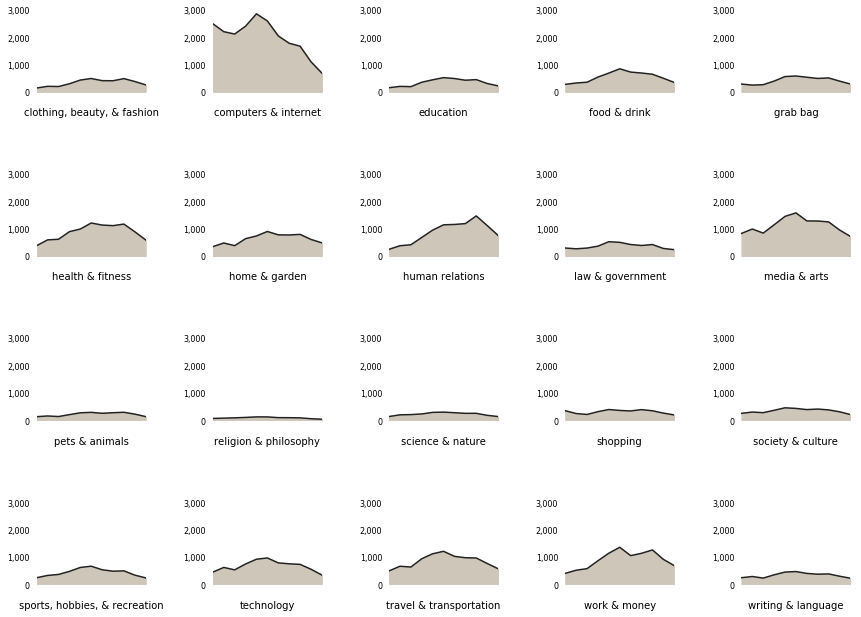

In [32]:
nrows=4;ncols=5
num_plots=nrows*ncols
assert num_plots == len(mydata)
figwidth=13/1.1
figheight=10/1.2
x_range=range(2004,2015,1)
fig=plt.figure(figsize=(figwidth,figheight))

axes=[plt.subplot(nrows,ncols,i) for i in range (1,num_plots+1)]

plt.tight_layout(pad=0,w_pad=3,h_pad=3)
plt.subplots_adjust(hspace=1)
plt.rcParams['xtick.major.pad']='8'

for i in range(len(categories)):
    ax=axes[i]
    y=data["n"][data.category==categories[i]]
    x=x_range
    ax.plot(x,y,color='#222222')
    ax.fill_between(x,y,0,color='#cec6b9')
    
    ax.set_ylim([0,3000])
    ax.set_xlim([2004,2014])
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    max_yticks=3
    yloc=plt.MaxNLocator(max_yticks)
    ax.yaxis.set_major_locator(yloc)
    
    ax.set_xticklabels(['2004','','','','','2014'])
    
    ax.set_xlabel(categories[i])
    ax.tick_params(axis='both',which='major',labelsize=8)
    
    def func(x, pos):
        s='{:0,d}'.format(int(x))
        return s
    
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(func))
plt.show()
    
    
    
    
    

In [34]:
import seaborn as sns;
sns.set(style="ticks",color_codes=True)

In [35]:
tips=sns.load_dataset("tips")

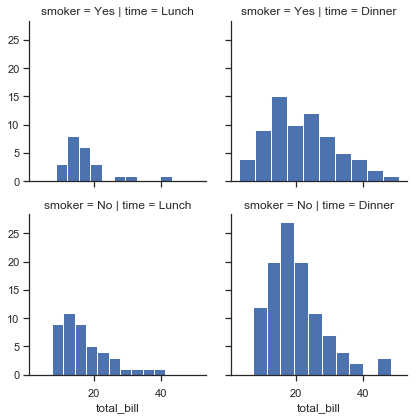

In [36]:
import matplotlib.pyplot as plt
g=sns.FacetGrid(tips,col="time",row="smoker")
g.map(plt.hist,"total_bill");

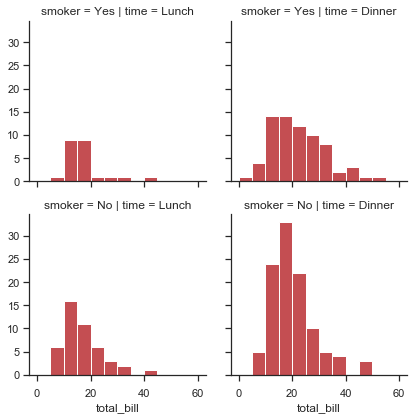

In [37]:
import numpy as np
bins=np.arange(0,65,5)
g=sns.FacetGrid(tips,col="time",row="smoker")
g.map(plt.hist,"total_bill",bins=bins,color="r");


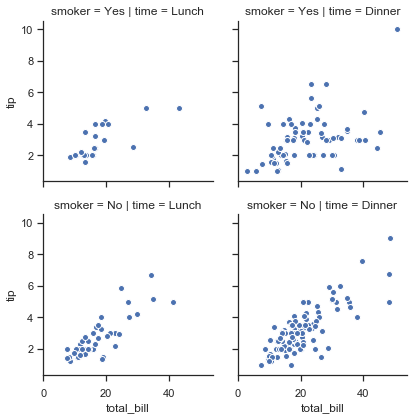

In [43]:
g = sns.FacetGrid(tips, col="time",row="smoker")
g.map(plt.scatter, "total_bill","tip",edgecolor="w");

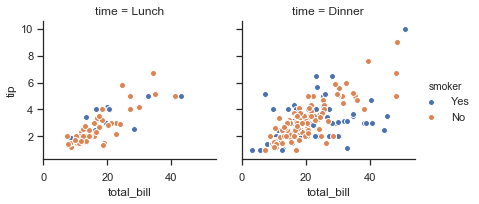

In [44]:
g=sns.FacetGrid(tips,col="time",hue="smoker")
(g.map(plt.scatter,"total_bill","tip",edgecolor="w").add_legend())

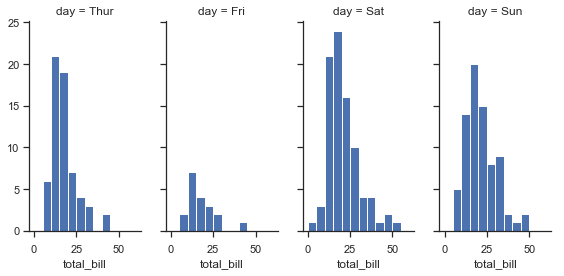

In [45]:
g=sns.FacetGrid(tips,col="day",height=4,aspect=0.5)
g.map(plt.hist,"total_bill",bins=bins);

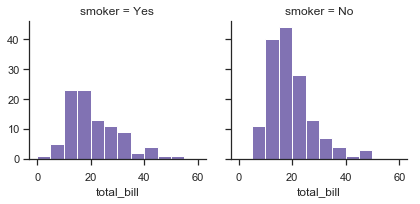

In [47]:
g=sns.FacetGrid(tips,col="smoker",col_order=["Yes","No"])
g.map(plt.hist,"total_bill",bins=bins,color="m");

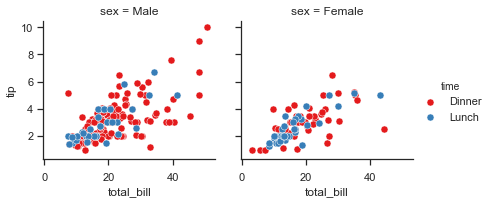

In [49]:
kws=dict(s=50,linewidth=0.5,edgecolor="w")
g=sns.FacetGrid(tips,col="sex",hue="time",palette="Set1",hue_order=["Dinner","Lunch"])
(g.map(plt.scatter,"total_bill","tip",**kws).add_legend());

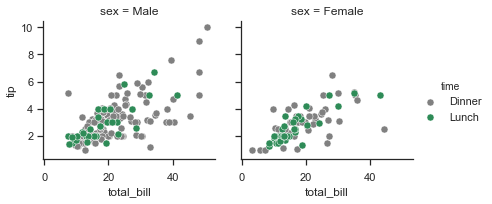

In [50]:
pal=dict(Lunch="seagreen",Dinner="gray")
g=sns.FacetGrid(tips,col="sex",hue="time",palette=pal,hue_order=["Dinner","Lunch"])
(g.map(plt.scatter,"total_bill","tip",**kws).add_legend())

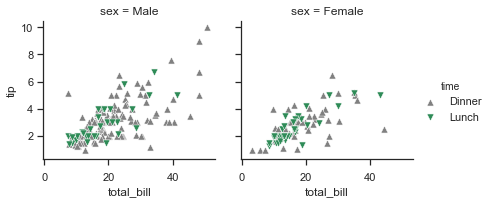

In [51]:
g=sns.FacetGrid(tips,col="sex",hue="time",palette=pal,hue_order=["Dinner","Lunch"],hue_kws=dict(marker=["^","v"]))
(g.map(plt.scatter,"total_bill","tip",**kws).add_legend())

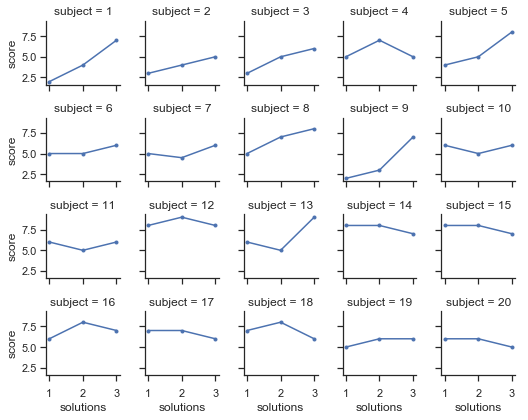

In [52]:
att=sns.load_dataset("attention")
g=sns.FacetGrid(att,col="subject",col_wrap=5,height=1.5)
g.map(plt.plot,"solutions","score",marker=".");